# Data model (Gini Index)


In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('/home/frenk/Documenti/Artificial Intelligence/UCI_HAR_Dataset/train.csv')
test = pd.read_csv('/home/frenk/Documenti/Artificial Intelligence/UCI_HAR_Dataset/test.csv')

In [3]:
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [4]:
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [5]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

# Perform Model (entropy)



In [6]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(criterion = 'gini')

## Accuracy

In [16]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
    
# calculate overall accuracty of the model
accuracy = metrics.accuracy_score(y_test, y_pred)

print('Accuracy: ', accuracy)
    

Accuracy:  0.8537495758398371


## Confusion Matrix


In [18]:
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print('\n {}'.format(cm))     

Confusion Matrix:

 [[537   0   0   0   0   0]
 [  0 376 115   0   0   0]
 [  0  82 450   0   0   0]
 [  0   0   0 455  28  13]
 [  0   0   0  20 354  46]
 [  0   0   0  76  51 344]]


### Plot Confusion Matrix

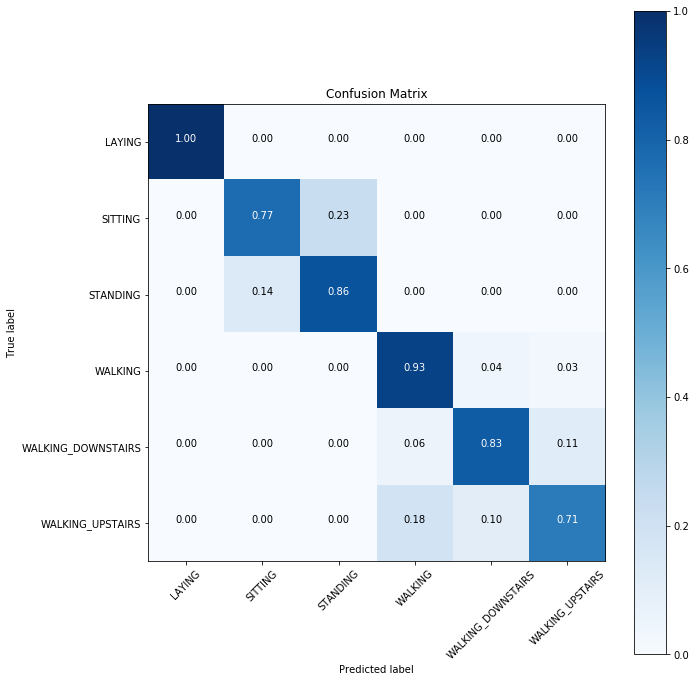

In [9]:
import itertools

plt.figure(figsize=(10,10))
plt.grid(b=False)

cmap = plt.cm.Blues
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

fmt = '.2f' 
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Classification Report

In [10]:
print('-------------------------')
print('| Classifiction Report |')
print('-------------------------')
classification_report = metrics.classification_report(y_test, y_pred)
print(classification_report)

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.84      0.77      0.80       491
          STANDING       0.80      0.86      0.83       532
           WALKING       0.81      0.93      0.86       496
WALKING_DOWNSTAIRS       0.83      0.83      0.83       420
  WALKING_UPSTAIRS       0.84      0.71      0.77       471

          accuracy                           0.85      2947
         macro avg       0.85      0.85      0.85      2947
      weighted avg       0.86      0.85      0.85      2947



# Pruning

Analyzing best value for min_samples_leaf

In [52]:
accuracy_res = [0]*10
for j in range (0,10):
    for i in range (0,10):
        dt = DecisionTreeClassifier(min_samples_leaf = i+1)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        accuracy_res[i] += metrics.accuracy_score(y_test, y_pred)

In [53]:
for i in range (0,10):
    accuracy_res[i] = accuracy_res[i]/10
print (accuracy_res)
max_accuracy = max(accuracy_res)
max_index = accuracy_res.index(max_accuracy)
print('Max Accuracy: ', max_accuracy, 'obtained with min_samples_leaf = ', max_index+1)

[0.8585001696640651, 0.8618255853410248, 0.8648795385137428, 0.8697658635900917, 0.8734984730234135, 0.8731930777061419, 0.8724465558194774, 0.871360705802511, 0.871700033932813, 0.8731591448931116]
Max Accuracy:  0.8734984730234135 obtained with min_samples_leaf =  5


Doing the same thing for max_depth starting from 4 to 13 as values for max depth

In [54]:
accuracy_md = [0]*10
for j in range (0,10):
    for i in range (0,10):
        dt = DecisionTreeClassifier(max_depth = i+4)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        accuracy_md[i] += metrics.accuracy_score(y_test, y_pred)

In [59]:
for i in range (0,10):
    accuracy_md[i] = accuracy_md[i]/10
print (accuracy_md)
max_accuracy_md = max(accuracy_md)
max_index = accuracy_md.index(max_accuracy)
print('Max Accuracy: ', max_accuracy, 'obtained with max_depth = ', max_index+4)

[0.809636918900577, 0.8389548693586699, 0.8551747539871055, 0.8642687478791992, 0.8710553104852392, 0.8744485917882592, 0.8657957244655581, 0.8667458432304038, 0.8655242619613166, 0.8615880556498133]
Max Accuracy:  0.8744485917882592 obtained with max_depth =  9


Comparing entropy and gini

In [69]:
accuracy_res_t = [0]*2
for i in range (0,10):
    dte = DecisionTreeClassifier(criterion = 'entropy')
    dtg = DecisionTreeClassifier(criterion = 'gini')
    dte.fit(X_train, y_train)
    dtg.fit(X_train, y_train)
    y_pred_e = dte.predict(X_test)
    y_pred_g = dtg.predict(X_test)
    accuracy_res_t[0] += metrics.accuracy_score(y_test, y_pred_e)
    accuracy_res_t[1] += metrics.accuracy_score(y_test, y_pred_g)

In [72]:
for i in range (0,2):
    accuracy_res_t[i] = accuracy_res_t[i]/10
print (accuracy_res_t)
max_accuracy_res_t = max(accuracy_res_t)
max_index = accuracy_res_t.index(max_accuracy_res_t)
print('Max Accuracy: ', max_accuracy, 'obtained in case = ', max_index)
print('\n0 stands for entropy, 1 for gini')

[0.8510688836104512, 0.8575161180861894]
Max Accuracy:  0.8744485917882592 obtained in case =  1

 0 stands for entropy, 1 for gini


In [73]:
dt = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 5, max_depth = 9)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.8768238887003733


In [100]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
depth = np.arange(1, 20, 5)
#ccp_values = np.arange(0, 1.2, 0.4)
parameters = {'criterion':['gini', 'entropy'], 'max_depth': depth,  'min_samples_leaf':depth}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [101]:
print("Tuned Decision Tree Parameters: {}".format(dt_grid.best_params_))
print("Best Score is {}".format(dt_grid.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 6}
Best Score is 0.8646645116238203


altra prova grid